In [1]:
! pip install colorcet

In [2]:
import os
import json
import ee
import geemap
from geemap import geojson_to_ee, ee_to_geojson
from ipyleaflet import GeoJSON
import colorcet

In [3]:
from colorcet.plotting import swatch, swatches
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<ipython-input-4-04d04cd91925>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  get_cmap("cet_fire")


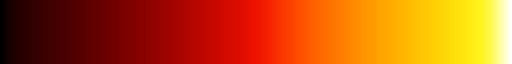

In [4]:
from matplotlib.cm import get_cmap

get_cmap("cet_fire")

In [6]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=vw3bk6tsZlTdi7s_wTjLhKmzJgsVoCvwgpUbX30ATNk&tc=HKI9wFkMMtgskLu-cSpQeikvVE0GTdNaxo_czVWM0v0&cc=wDvGG0NWvQnVltIXB3y4-KvduVuUf4R_2TiflcwxghY

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXl4D9qcun9oDS5GFtwouY5V3KIhFR7lv1DmY7mVw5XK_sGII4-_MSk

Successfully saved authorization token.


In [7]:
ee.Initialize()

In [8]:
bbox = ee.Geometry.Polygon( # all of costa rica
    [[
        [-85.9, 8.0],  # Lower left corner (southwest)
        [-85.9, 11.2], # Upper left corner (northwest)
        [-82.5, 11.2], # Upper right corner (northeast)
        [-82.5, 8.0],  # Lower right corner (southeast)
        [-85.9, 8.0]   # Closing the polygon by repeating the first point
    ]]
)


In [9]:
# Load the datasets
dem = ee.Image('USGS/SRTMGL1_003').clip(bbox)
slope = ee.Terrain.slope(dem)
landcover = ee.Image("ESA/WorldCover/v100/2020").select('Map').clip(bbox)
flow_direction = ee.Image('WWF/HydroSHEDS/03DIR').clip(bbox)
ghsl = ee.Image("JRC/GHSL/P2023A/GHS_BUILT_C/2018").clip(bbox)

In [10]:
# load hydrogeography90 datasets
stream_dist_proximity_collection = ee.ImageCollection("projects/sat-io/open-datasets/HYDROGRAPHY90/stream-outlet-distance/stream_dist_proximity")\
    .filterBounds(bbox)\
    .mosaic()
stream_dist_proximity = stream_dist_proximity_collection.clip(bbox).rename('stream_distance')

flow_accumulation_collection = ee.ImageCollection("projects/sat-io/open-datasets/HYDROGRAPHY90/base-network-layers/flow_accumulation")\
    .filterBounds(bbox)\
    .mosaic()
flow_accumulation = flow_accumulation_collection.clip(bbox).rename('flow_accumulation')

spi_collection = ee.ImageCollection("projects/sat-io/open-datasets/HYDROGRAPHY90/flow_index/spi")\
    .filterBounds(bbox)\
    .mosaic()
spi = spi_collection.clip(bbox).rename('spi')

sti_collection = ee.ImageCollection("projects/sat-io/open-datasets/HYDROGRAPHY90/flow_index/sti")\
    .filterBounds(bbox)\
    .mosaic()
sti = sti_collection.clip(bbox).rename('sti')

cti_collection = ee.ImageCollection("projects/sat-io/open-datasets/HYDROGRAPHY90/flow_index/cti")\
    .filterBounds(bbox)\
    .mosaic()
cti = cti_collection.clip(bbox).rename('cti')

In [11]:
# load geomorph data
tpi_collection = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/tpi")\
    .filterBounds(bbox)\
    .mosaic()
tpi = tpi_collection.clip(bbox).rename('tpi')

tri_collection = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/tri")\
    .filterBounds(bbox)\
    .mosaic()
tri = tri_collection.clip(bbox).rename('tri')

pcurv_collection = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/pcurv")\
    .filterBounds(bbox)\
    .mosaic()
pcurv = pcurv_collection.clip(bbox).rename('pcurv')

tcurv_collection = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/tcurv")\
    .filterBounds(bbox)\
    .mosaic()
tcurv = tcurv_collection.clip(bbox).rename('tcurv')

aspect_collection = ee.ImageCollection("projects/sat-io/open-datasets/Geomorpho90m/aspect")\
    .filterBounds(bbox)\
    .mosaic()
aspect = aspect_collection.clip(bbox).rename('aspect')

In [12]:
hydro_proj = stream_dist_proximity.projection()

## set time frame
before_start= '2023-09-25'
before_end='2023-10-05'

after_start='2023-10-05'
after_end='2023-10-15'

# SET SAR PARAMETERS (can be left default)

# Polarization (choose either "VH" or "VV")
polarization = "VH"  # or "VV"

# Pass direction (choose either "DESCENDING" or "ASCENDING")
pass_direction = "DESCENDING"  # or "ASCENDING"

# Difference threshold to be applied on the difference image (after flood - before flood)
# It has been chosen by trial and error. Adjust as needed.
difference_threshold = 1.25

# Relative orbit (optional, if you know the relative orbit for your study area)
# relative_orbit = 79

# Rename the selected geometry feature
aoi = bbox

# Load and filter Sentinel-1 GRD data by predefined parameters
collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
    .filter(ee.Filter.eq('instrumentMode', 'IW')) \
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', polarization)) \
    .filter(ee.Filter.eq('orbitProperties_pass', pass_direction)) \
    .filter(ee.Filter.eq('resolution_meters', 10)) \
    .filterBounds(aoi) \
    .select(polarization)

# Select images by predefined dates
before_collection = collection.filterDate(before_start, before_end)
after_collection = collection.filterDate(after_start, after_end)

# Create a mosaic of selected tiles and clip to the study area
before = before_collection.mosaic().clip(aoi)
after = after_collection.mosaic().clip(aoi)

# Apply radar speckle reduction by smoothing
smoothing_radius = 50
before_filtered = before.focal_mean(smoothing_radius, 'circle', 'meters')
after_filtered = after.focal_mean(smoothing_radius, 'circle', 'meters')

# Calculate the difference between the before and after images
difference = after_filtered.divide(before_filtered)

# Apply the predefined difference-threshold and create the flood extent mask
threshold = difference_threshold
difference_binary = difference.gt(threshold)

# Refine the flood result using additional datasets
swater = ee.Image('JRC/GSW1_0/GlobalSurfaceWater').select('seasonality')
swater_mask = swater.gte(10).updateMask(swater.gte(10))
flooded_mask = difference_binary.where(swater_mask, 0)
flooded = flooded_mask.updateMask(flooded_mask)
connections = flooded.connectedPixelCount()
flooded = flooded.updateMask(connections.gte(8))

# Mask out areas with more than 5 percent slope using a Digital Elevation Model
DEM = ee.Image('WWF/HydroSHEDS/03VFDEM')
terrain = ee.Algorithms.Terrain(DEM)
slope = terrain.select('slope')
flooded = flooded.updateMask(slope.lt(5))

# Set the default projection from the hydrography dataset
flooded = flooded.setDefaultProjection(hydro_proj)

# Now, reduce the resolution
flooded_mode = flooded.reduceResolution(
    reducer=ee.Reducer.mode(),
    maxPixels=10000
).reproject(
    crs=hydro_proj
)

# Reproject the flooded image to match the DEM's projection
dem_projection = dem.projection()
flooded_reprojected = flooded.reproject(crs=dem_projection)

In [13]:
# Assuming 'flooded_mode' is your final flood detection image and 'aoi' is your area of interest

# Create a full-area mask, initially marking everything as non-flooded (value 0)
full_area_mask = ee.Image.constant(0).clip(aoi)

# Update the mask to mark flooded areas (value 1)
# Assuming flooded_mode is a binary image with 1 for flooded areas and 0 elsewhere
flood_labeled_image = full_area_mask.where(flooded_reprojected, 1)

# Now flood_labeled_image contains 1 for flooded areas and 0 for non-flooded areas


In [14]:
combined = (dem.addBands(landcover.select('Map').rename("landcover"))
    .addBands(slope)
    .addBands(ghsl)
    .addBands(flow_direction.rename("flow_direction"))
    .addBands(stream_dist_proximity)
    .addBands(flood_labeled_image.rename("flooded_mask"))
    .addBands(flow_accumulation)
    .addBands(spi)
    .addBands(sti)
    .addBands(cti)
    .addBands(tpi)  # Adding TPI
    .addBands(tri)  # Adding TRI
    .addBands(pcurv)  # Adding PCURV
    .addBands(tcurv)  # Adding TCURV
    .addBands(aspect))  # Adding ASPECT

In [15]:
# Get all band names from the combined image
allBandNames = combined.bandNames()

# Remove the class band name ('flooded_full_mask') to get input properties
inputProperties = allBandNames.filter(ee.Filter.neq('item', 'flooded_mask'))

# Perform stratified sampling
stratifiedSample = combined.stratifiedSample(
    numPoints=25000,  # Total number of points
    classBand='flooded_mask',  # Band to stratify by
    region=bbox,
    scale=30,
    seed=0
).randomColumn()

# Split into training and testing
training = stratifiedSample.filter(ee.Filter.lt('random', 0.7))
testing = stratifiedSample.filter(ee.Filter.gte('random', 0.7))

# Set up the Random Forest classifier for flood prediction
classifier = ee.Classifier.smileRandomForest(10).train(
    features=training,
    classProperty='flooded_mask',  # Use 'flooded_full_mask' as the class property
    inputProperties=inputProperties  # Dynamically generated input properties
)

# Classify the image
classified = combined.select(inputProperties).classify(classifier)

# Assess accuracy
testAccuracy = testing.classify(classifier).errorMatrix('flooded_mask', 'classification')

# Calculate accuracy
accuracy = testAccuracy.accuracy().getInfo()

# Convert the confusion matrix to an array
confusionMatrixArray = testAccuracy.array().getInfo()

# Calculate recall for the positive class (assuming '1' represents the positive class for flooding)
true_positives = confusionMatrixArray[1][1]  # True positives
false_negatives = confusionMatrixArray[1][0]  # False negatives
false_positives = confusionMatrixArray[0][1]  # False positives (non-flooded incorrectly identified as flooded)
true_negatives = confusionMatrixArray[0][0]  # True negatives (non-flooded correctly identified as non-flooded)
recall = true_positives / (true_positives + false_negatives)
false_positive_rate = false_positives / (false_positives + true_negatives)

print('Confusion Matrix:', confusionMatrixArray)
print('Accuracy:', accuracy)
print('Recall:', recall)
print('False Positive Rate:', false_positive_rate)

Confusion Matrix: [[6888, 679], [399, 6954]]
Accuracy: 0.9277479892761394
Recall: 0.9457364341085271
False Positive Rate: 0.08973172987974098


In [20]:
# Set up the Random Forest classifier for flood prediction with probability output
classifier = ee.Classifier.smileRandomForest(10).setOutputMode('PROBABILITY').train(
        features=training,
        classProperty='flooded_mask',
        inputProperties=inputProperties
    )

# Classify the image to get probabilities
probabilityImage = combined.select(inputProperties).classify(classifier)

# Visualization parameters for probability with white at the midpoint
vizParamsProbability = {
    'min': 0,
    'max': 1,
    'palette': colorcet.fire
}

In [17]:
classifiedImage = combined.classify(classifier)

vizParamsClassified = {'min': 0, 'max': 1, 'palette': ['green', 'red']}
vizParamsUnclassified = {'min': 0, 'max': 1, 'palette': ['gray']}


classifiedMask = classifiedImage.mask()
unclassifiedMask = classifiedImage.unmask(0).eq(0)

In [21]:
m = geemap.Map()
m.add("basemap_selector")
m.add("layer_manager")

# Center the map on San Jose, Costa Rica
m.setCenter(-84.0833, 9.9333, 10)
m.addLayer(classifiedImage, vizParamsClassified, 'Classified')
m.addLayer(landcover, {}, 'ESA WorldCover 2020')
m.addLayer(probabilityImage, vizParamsProbability, 'Flood Probability')
m.addLayer(flooded, {'palette': 'blue'}, 'Flooded')
m.addLayer(swater_mask, {'palette': 'grey'}, 'Permanent Surface Water')
# m.addLayer(flood_labeled_image, {'palette': 'blue'}, 'Flooded mask')
# Display the map
m

Map(center=[9.9333, -84.0833], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [ ]:
geemap.ee_export_image(probabilityImage, filename="costa_rica_flood_probabilities.tif", scale=300, region=aoi)

Generating URL ...
Please wait ...
Data downloaded to /content/costa_rica_flood_probabilities.tif


In [ ]:
san_jose = ee.Geometry.Polygon([
    [
        [-84.52073469866146, 9.554427321389259],
        [-83.61258439158091, 9.554427321389259],
        [-83.61258439158091, 10.280374182928231],
        [-84.52073469866146, 10.280374182928231],
        [-84.52073469866146, 9.554427321389259]
    ]
])

geemap.ee_export_image(probabilityImage, filename="san_jose_flood_probabilities_60m.tif", scale=60, region=san_jose)

Generating URL ...
Please wait ...
Data downloaded to /content/san_jose_flood_probabilities_60m.tif
